FFR 120  
Felix Waldschock

HW 3 
Exercise 12.3
## The Albert-Barabasi preferential-growth model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange



In [2]:
# parameters
m = 3
n0 = 5
n = 100


In [3]:
# generate adjacency matrix
def generateAdjacencyMatrix(n):
    A = np.ones((n,n))
    # diagonal = 0 
    np.fill_diagonal(A, 0)
    return A

In [4]:
def getDegree(A):
    # get the sum over one axis, e.g the columns
    return np.sum(A,axis=0)

In [5]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')
    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')

In [6]:
def rouletteWheelSelection(Vector):
    # make a cumsum of the vector
    cumsum = np.cumsum(Vector)
    # normalize the cumsum
    cumsum = cumsum / np.sum(Vector)

    # generate a random number between 0 and 1
    r = np.random.rand()

    # find the index of the cumsum using searchsorted
    index = np.searchsorted(cumsum, r)

    # set the vector[index] to 0
    Vector[index] = 0

    return index, Vector

In [7]:
def AlbertBarabasi(A, m, n0, n):
    A_ = A.copy()
    # loop over (n-n0)
    for i in range(n-n0):

        # add a new node to A, pad with zeros
        A_ = np.pad(A_, ((0,1),(0,1)), 'constant', constant_values=0)

        # add the new node to m extant nodes choosem randomly using a probability that is proportional to their degree
        degree = getDegree(A_)
        for j in range(m):
            # get the probability
            indx, degree = rouletteWheelSelection(degree)
            
            # add the edge
            A_[indx,-1] = 1
            A_[-1,indx] = 1

    return A_

Shape of B: (5, 5)
Shape of B_: (1000, 1000)


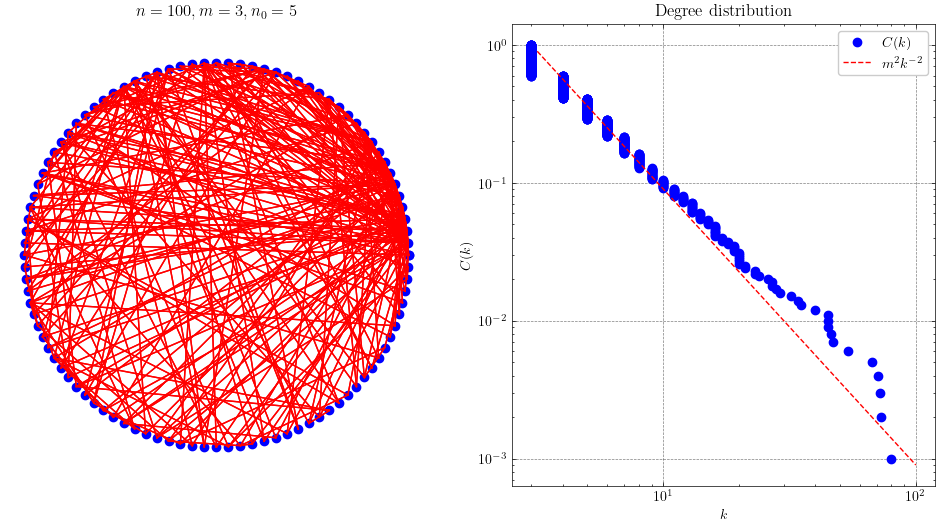

In [10]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


n = 100
n0 = 5
m = 3
A = generateAdjacencyMatrix(n0)
A = AlbertBarabasi(A, m, n0, n)

# Plot the two matrices and hand over their parameters, n c p
plot_ErdosRenyi(A, axes[0], f"$n = {n}, m = {m}, n_0 = {n0}$")

### Subplot of the degree distribution

# for the degree dist, make a new Matrix with n = 1000 , m=3 n0 = 5
n = 1000
n0 = 5
m = 3

# generate the adjacency matrix
B = generateAdjacencyMatrix(n0)
print("Shape of B:",B.shape)
B = AlbertBarabasi(B, m, n0, n)
print("Shape of B_:",B.shape)

# plot the degree distribution
Ds = getDegree(B)
# sort Ds in descending order
Ds = np.sort(Ds)[::-1]

# init the u vector with is the linear array with 1/n, 2/n ... to  n/n
u = np.linspace(1/n,1,n)

# normalize Ds so that max is 1
#Ds = Ds / np.max(Ds)

axes[1].loglog(Ds,u,'o',color='blue')
axes[1].set_xlabel('$k$')
axes[1].set_ylabel('$C(k)$')

# plot the trend line described by m**2 * k**(-2)
x = np.logspace(0.5,2,100)
y = m**2 * x**(-2)
axes[1].loglog(x,y,'--',color='red')
axes[1].legend(['$C(k)$','$m^2k^{-2}$'])
axes[1].set_title('Degree distribution')


# Show the plot
plt.show()